# Lab 3

Purusharth Malik

2348542

Dataset for the lab - <a href='https://www.kaggle.com/datasets/d4rklucif3r/market-basket-optimisation'>Market Basket Analysis</a>

## Importing the dataset and making first impressions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Since there are no columns and simply transactions, we will set header to None
df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have been given a dataset of transactions made by different customers. Each row describes the items bought by a single customer in one invoice.

### Converting the dataframe into a list of transactions

In [4]:
lol = []
for _ in df.iterrows():
    lol.append(pd.Series(_[1].values).dropna().values.tolist())

In [19]:
lol[:10]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries']]

In [6]:
#Making a list of all the unique elements
unique_items = []
for i in lol:
    for j in i:
        if j not in unique_items:
            unique_items.append(j)

### Creating a dataframe of all the items

In [7]:
item_matrix = pd.DataFrame(0, columns=unique_items, index=unique_items)

In [8]:
item_matrix

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
shrimp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
almonds,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
avocado,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vegetables mix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
green grapes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
burger sauce,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
oatmeal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asparagus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cream,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Filling the dataframe with transaction details
for i in lol:
    temp_items = []
    # we will start the inner counter from the last element to keep track of the items without going through the complete list in every iteration
    for j in i[::-1]:
        temp_items.append(j)
        for k in temp_items:
            if j!=k:
                item_matrix[j][k]+=1

In [10]:
item_matrix

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
shrimp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
almonds,17,0,12,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
avocado,23,1,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vegetables mix,20,8,8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
green grapes,8,6,7,11,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
burger sauce,8,0,1,2,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
oatmeal,5,1,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
asparagus,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cream,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


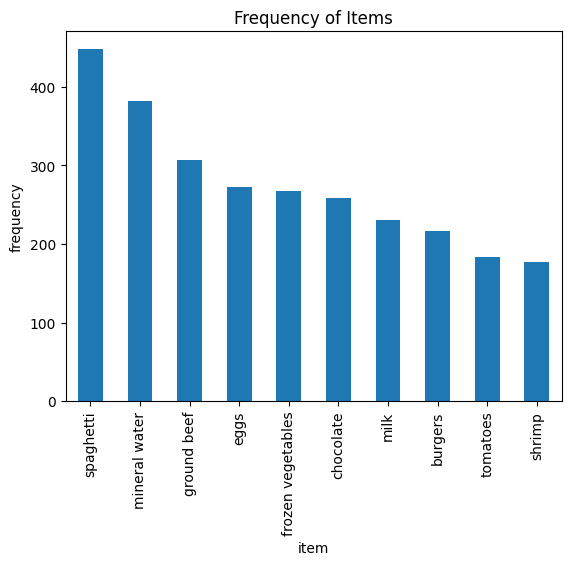

In [122]:
item_matrix.max().sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('frequency')
plt.xlabel('item')
plt.title('Frequency of Items')
plt.show()

### Creating a dataframe of the transactions

In [12]:
transactions = pd.DataFrame(columns=unique_items)

In [13]:
transactions

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins


In [14]:
counter = 0
for i in lol:
    counter+=1
    transactions.loc[counter] = False
    for j in i:
        transactions[j][counter]= True

In [15]:
transactions

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7500,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [21]:
results = apriori(transactions, min_support=0.01, use_colnames=True)
results.sort_values('itemsets')

,support,itemsets
0,0.071457,(shrimp)
163,0.036395,"(french fries, eggs)"
164,0.021730,"(eggs, frozen vegetables)"
165,0.036528,"(eggs, spaghetti)"
166,0.010532,"(eggs, cookies)"
...,...,...
92,0.014798,"(chocolate, low fat yogurt)"
93,0.031063,"(mineral water, green tea)"
94,0.011199,"(green tea, frozen smoothie)"
255,0.010532,"(eggs, spaghetti, chocolate)"


In [22]:
rules = association_rules(results, 'confidence', min_threshold=0.3).sort_values('confidence', ascending=False)[['antecedents', 'consequents', 'confidence']]
rules

,antecedents,consequents,confidence
42,"(eggs, ground beef)",(mineral water),0.506667
48,"(milk, ground beef)",(mineral water),0.503030
59,"(chocolate, ground beef)",(mineral water),0.473988
44,"(frozen vegetables, milk)",(mineral water),0.468927
10,(soup),(mineral water),0.456464
...,...,...,...
7,(turkey),(mineral water),0.307036
31,(tomatoes),(spaghetti),0.306043
54,"(mineral water, chocolate)",(spaghetti),0.301266
29,(soup),(milk),0.300792


In [23]:
#Looking at the associations with only 1 antecedents
one_item_sets = rules[rules.antecedents.apply(lambda x: len(x))==1]
one_item_sets

,antecedents,consequents,confidence
10,(soup),(mineral water),0.456464
6,(olive oil),(mineral water),0.419028
21,(ground beef),(mineral water),0.416554
4,(salmon),(mineral water),0.401254
24,(cereals),(mineral water),0.398964
34,(ground beef),(spaghetti),0.398915
13,(cooking oil),(mineral water),0.394256
17,(red wine),(mineral water),0.388626
15,(chicken),(mineral water),0.380000
11,(frozen vegetables),(mineral water),0.374825


In [116]:
one_item_sets.groupby('consequents').max()

,antecedents,confidence
consequents,,
(mineral water),(turkey),0.456464
(spaghetti),(tomatoes),0.398915
(eggs),(turkey),0.330275
(ground beef),(herb & pepper),0.323450
(milk),(soup),0.300792


These are the top associations in our given dataset.

# End